In [1]:
import mne
mne.viz.set_3d_backend('pyvistaqt')
raw = mne.io.read_raw_brainvision('//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/YH00/YH00_clean_1.vhdr')

Using pyvistaqt 3d backend.
Extracting parameters from //datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/YH00/YH00_clean_1.vhdr...
Setting channel info structure...


C:\Users\amukesh\AppData\Local\Temp\2\ipykernel_27744\1640138611.py:3: RuntimeWarning: No coordinate information found for channels ['Sound']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision('//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/YH00/YH00_clean_1.vhdr')
C:\Users\amukesh\AppData\Local\Temp\2\ipykernel_27744\1640138611.py:3: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Sound']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision('//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/YH00/YH00_clean_1.vhdr')


(170960, 64)

In [26]:
events, event_id = mne.events_from_annotations(raw)
event_id_clean = {
    '1': event_id['Stimulus/S  1'],
    '2': event_id['Stimulus/S  2'],
}

#events, _ = mne.events_from_annotations(raw, event_id=event_id)
epoch_1=mne.Epochs(raw,events,event_id={'1': event_id_clean['1']},tmin=-5,tmax=150,baseline=(-5,0),preload=True)
epoch_2=mne.Epochs(raw,events,event_id={'2': event_id_clean['2']},tmin=-5,tmax=150,baseline=(-5,0),preload=True)


Used Annotations descriptions: [np.str_('New Segment/'), np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2')]
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1 events and 155001 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1 events and 155001 original time points ...
1 bad epochs dropped


C:\Users\amukesh\AppData\Local\Temp\2\ipykernel_27744\3674122285.py:9: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epoch_2=mne.Epochs(raw,events,event_id={'2': event_id_clean['2']},tmin=-5,tmax=150,baseline=(-5,0),preload=True)


In [29]:
(epoch_1.get_data()).shape

(1, 64, 155001)

In [11]:
raw

<RawBrainVision | YH00_clean_1.eeg, 64 x 170960 (171.0 s), ~94 KiB, data not loaded>

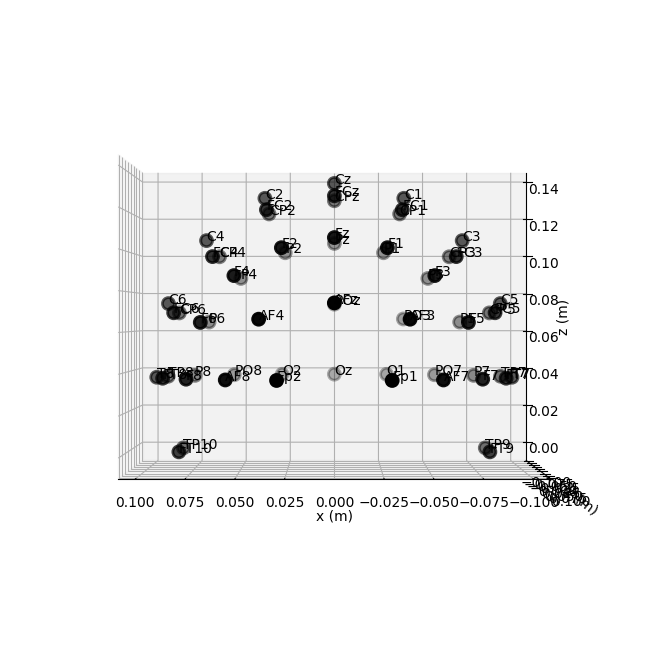

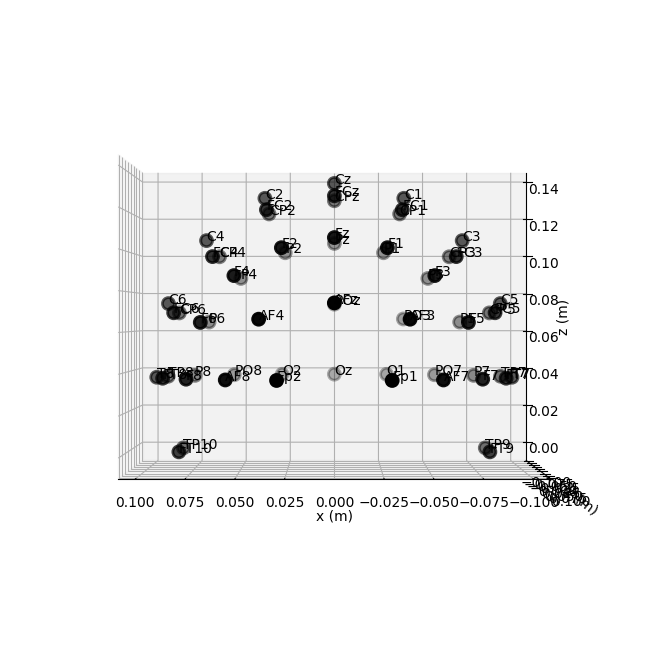

In [2]:
montage = mne.channels.make_standard_montage("easycap-M1")  # or 'standard_1005'
raw.set_montage(montage, on_missing='warn')
raw.plot_sensors(kind='3d',show_names=True)

In [ ]:
print(raw.ch_names)